# Modelo de seguro medico 

Variaveis:
* idade: idade do membro do plano de saude
* imc(bmi): indice de massa corporea
* dependentes(children): dependentes da pessoa no plano
* fumante(smoker): se a pessoa fuma ou não
* região(region): area onde a pessoa vive

Resultado:
* custos(charges:) custos por paciente

In [1]:
# importando as bibliotecas
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.regression.linear_model as sm

In [2]:
# carga de dados
dados = pd.read_csv("../medical-insurance/data/insurance.csv")

In [3]:
#Conta os dados
dados.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [4]:
# contagem de vazios
dados.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
# informações basicas como tipos de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
dados.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
# visualização do inicio
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
# separando fumantes de não fumantes
fumantes = dados[(dados["smoker"] == "yes")]
nao_fumantes = dados[(dados["smoker"] == "no")]

[]

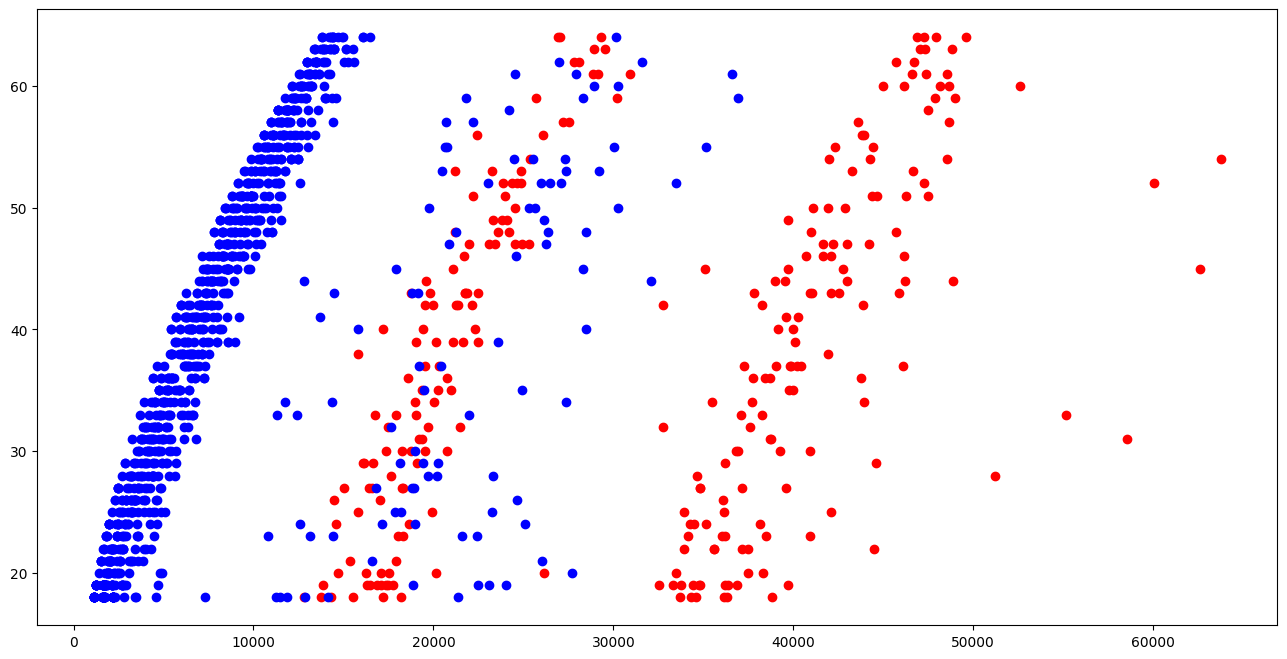

In [9]:
# visualização para conferir outliers
plt.figure(figsize=(16, 8))
plt.scatter(fumantes["charges"],fumantes["age"], color='r')
plt.scatter(nao_fumantes["charges"],nao_fumantes["age"], color='b' )
plt.ylabel = "Idade"
plt.xlabel = "Custos"
plt.plot()

In [10]:
# removendo outliers
dados["charges"] = dados["charges"].apply(lambda x: np.nan if x > 50000 else x)

In [11]:
dados.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     7
dtype: int64

In [12]:
# substituindo valores nulos gerados
dados.sort_values(by="age").reset_index()
dados["charges"].fillna(dados["charges"].interpolate(method="linear"), inplace=True)
dados["charges"].fillna(dados["charges"][(dados["smoker"] == 'yes') & (dados["age"] == 19)].mean(), inplace=True)

In [13]:
dados.describe()
dados.sort_values(by="age").reset_index(inplace=True)
dados

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Transformaremos as categorias necessárias para numericos


In [14]:
regioes = list(dados.region.unique())


In [15]:
# tranformando as classificações em genericos
dados["sex"] = dados["sex"].map(lambda x: 1 if x == "female" else 0 )
dados["smoker"] = dados["smoker"].map(lambda x: 1 if x == "yes" else 0)
dados["region"] = dados["region"].map(lambda x: regioes.index(x))

In [16]:
dados.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
5,31,1,25.740,0,0,1,3756.62160
6,46,1,33.440,1,0,1,8240.58960
7,37,1,27.740,3,0,2,7281.50560
8,37,0,29.830,2,0,3,6406.41070
9,60,1,25.840,0,0,2,28923.13692


In [17]:
# informações basicas como tipos de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [18]:
# dados do modelo
X = dados.iloc[:, 0:6].values
y = dados.iloc[:, 6].values


In [19]:
# treino do modelo e estatisticas R2 > 7 o modelo descreve bem
modelo_prod = sm.OLS(y,X).fit()
modelo_prod.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.870
Model:                            OLS   Adj. R-squared (uncentered):              0.869
Method:                 Least Squares   F-statistic:                              1484.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):                        0.00
Time:                        13:48:14   Log-Likelihood:                         -13606.
No. Observations:                1338   AIC:                                  2.722e+04
Df Residuals:                    1332   BIC:                                  2.726e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           205.4593     11.622     17.678      0.000     182.660     228.259
x2          -676.4333    340.534     -1.986      0.047   -1344.475      -8.391
x3            34.7185     16.573      2.095      0.036       2.206      67.231
x4           343.4925    142.496      2.411      0.016      63.952     623.033
x5          2.219e+04    427.783     51.865      0.000    2.13e+04     2.3e+04
x6          -245.7796    148.810     -1.652      0.099    -537.708      46.149
==============================================================================
Omnibus:                      209.170   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              428.033
Skew:                           0.919   Prob(JB):                     1.13e-93
Kurtosis:                       5.074   Cond. No.                         127.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# checando os dados previstos pelo modelo
plt.figure(figsize=(12, 8))
plt.scatter(dados["age"], modelo_prod.predict(X), color="b")
plt.xlabel(xlabel="Idade")
plt.
plt.plot()

SyntaxError: invalid syntax (1424042599.py, line 5)

In [21]:
teste = np.array([[18,1,30.740,0,0,0]])
modelo_prod.predict(pd.DataFrame(teste))

0    4089.080841
dtype: float64

In [22]:
modelo_prod.predict([[18,1,25.740,0,0,0]])

array([3915.48837743])

# Conclusão
1. Homens custam em media 600 dolares a mais que as mulheres 
2. Crianças aumentam o valor do seguro em quase 400 dolares
3. A região aumenta o valor do seguro em mais de 300 dolares
4. Fumar aumenta os custos de 3 a 5 vezes 